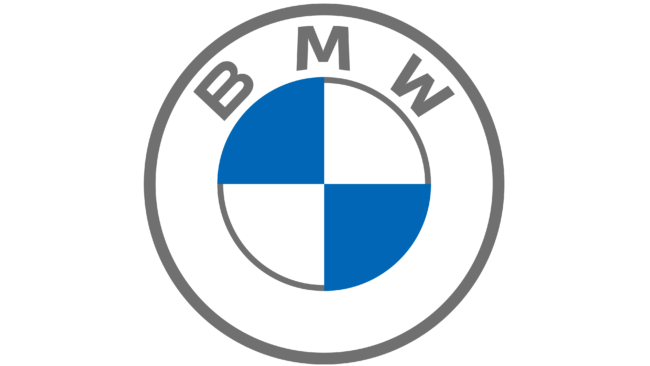

# Predicting prices on BMW cars.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bmw = pd.read_csv('bmw.csv')
bmw.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


Looking data in order to find missing values that could affect our analysis.

In [35]:
bmw.shape

(10781, 9)

In [36]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


Calculating some metrics.

In [37]:
bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [38]:
bmw['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

Plotting a graph that shows the density in every BMW model according to the price.

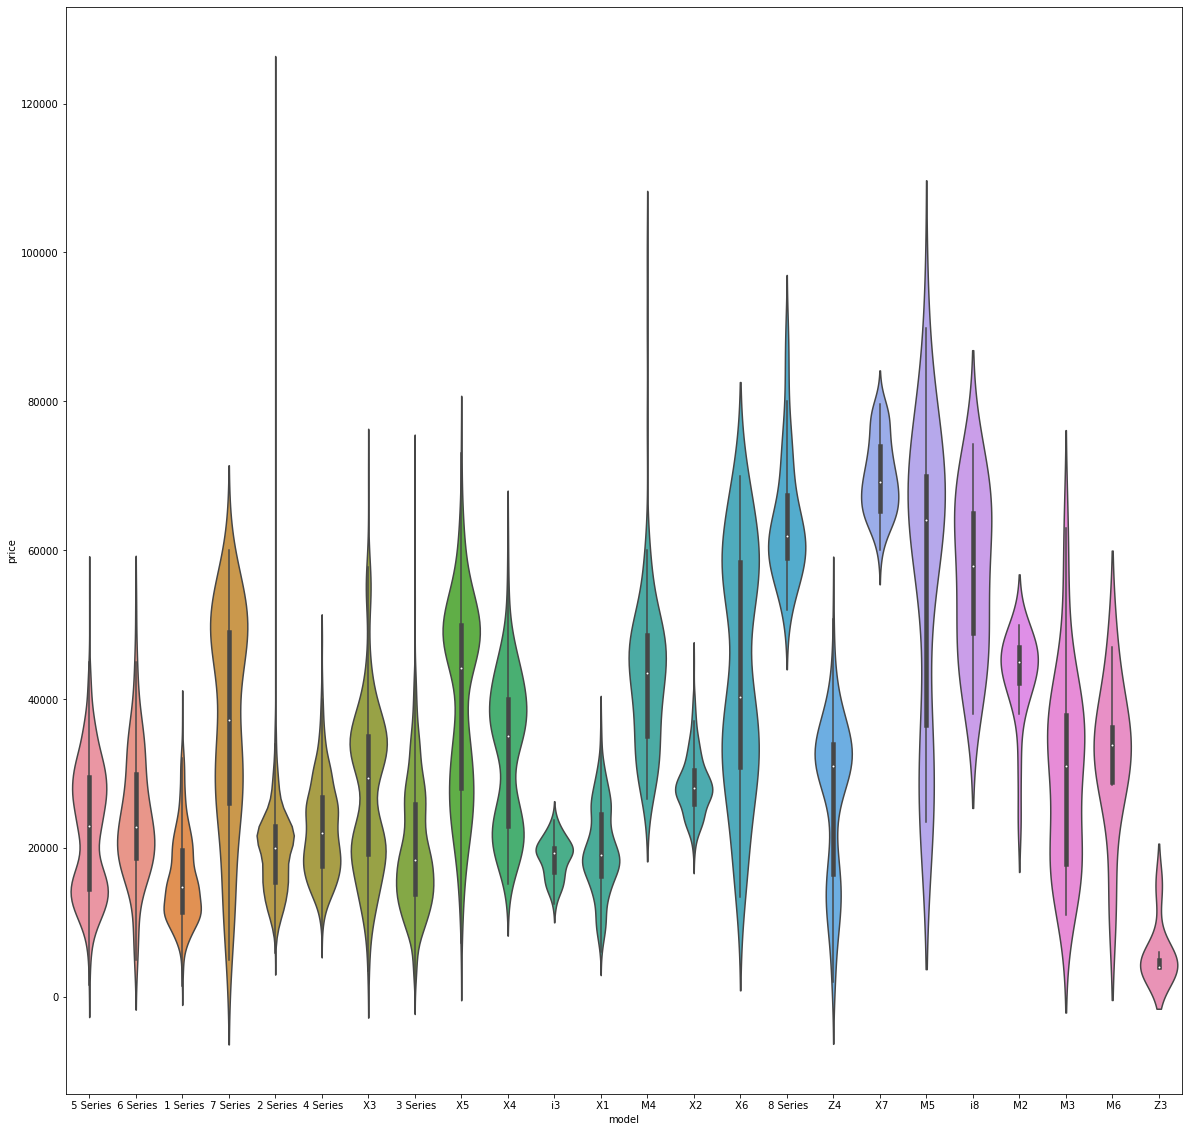

In [89]:
fig = plt.figure(figsize=(20,20))
sns.violinplot(x='model',y='price',data=bmw,scale='width')

This histogram shows that most of the cars that are in sale are under 50000 miles of usage.

(array([2.141e+03, 1.603e+03, 8.760e+02, 5.930e+02, 6.170e+02, 6.600e+02,
        5.960e+02, 5.600e+02, 4.700e+02, 3.930e+02, 3.670e+02, 2.850e+02,
        2.280e+02, 2.140e+02, 2.010e+02, 1.630e+02, 1.530e+02, 1.370e+02,
        1.140e+02, 9.000e+01, 7.200e+01, 6.900e+01, 4.600e+01, 2.600e+01,
        2.400e+01, 1.600e+01, 1.200e+01, 7.000e+00, 6.000e+00, 8.000e+00,
        1.500e+01, 3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.0000000e+00, 4.2809800e+03, 8.5609600e+03, 1.2840940e+04,
        1.7120920e+04, 2.1400900e+04, 2.5680880e+04, 2.9960860e+04,
        3.4240840e+04, 3.8520820e+04, 4.2800800e+04, 4.7080780e+04,
        5.1360760e+04, 5.5640740e+04, 5.9920720e+04, 6.4200700e+04,
        6.8480680e+04, 7.2760660e+04, 7.7040640e+04, 8.1320620e+04,
        8.5600600e+04, 8.9880580e+04

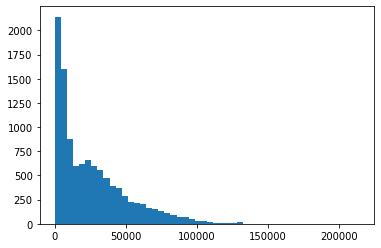

In [40]:
plt.hist(x='mileage',data=bmw,bins=50,histtype='stepfilled',label='mileage')

In [41]:
bmw_one = pd.get_dummies(bmw,columns=['model','transmission','fuelType'])

In [42]:
bmw_one.head(10)

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2018,27000,14827,145,42.8,2.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2016,16000,62794,160,51.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2017,12750,26676,145,72.4,1.5,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2014,14500,39554,160,50.4,3.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,2016,14900,35309,125,60.1,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,2017,16000,38538,125,60.1,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,2018,16250,10401,145,52.3,1.5,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
8,2017,14250,42668,30,62.8,2.0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
9,2016,14250,36099,20,68.9,2.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


Correlation between columns after getting dummies.

In [43]:
bmw_one.corrwith(bmw_one['price'])

year                      0.623756
price                     1.000000
mileage                  -0.605397
tax                       0.263484
mpg                      -0.204882
engineSize                0.460196
model_ 1 Series          -0.286218
model_ 2 Series          -0.100367
model_ 3 Series          -0.135266
model_ 4 Series          -0.006564
model_ 5 Series          -0.005658
model_ 6 Series           0.014285
model_ 7 Series           0.123968
model_ 8 Series           0.217816
model_ M2                 0.078978
model_ M3                 0.032906
model_ M4                 0.194895
model_ M5                 0.159359
model_ M6                 0.022575
model_ X1                -0.072538
model_ X2                 0.083500
model_ X3                 0.102162
model_ X4                 0.113693
model_ X5                 0.315717
model_ X6                 0.184239
model_ X7                 0.295525
model_ Z3                -0.037753
model_ Z4                 0.037616
model_ i3           

# Making predictions.

In [44]:
from sklearn.model_selection import train_test_split
X = bmw_one.drop(['price'],axis=1)
y = bmw_one['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8693183284854017

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9505632874243706

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0,max_depth=6,n_estimators=120)
gbr.fit(X_train,y_train)
gbr.score(X_test,y_test)

0.9512953351881862

GradientBoostingRegressor seems to be the best model to predict prices with a score of 0.951, or in other way, with 95.1% of accuracy. 

In [87]:
results = X_test.copy()
results['predicted_lr'] = lr.predict(X_test)
results['predicted_rfr'] = rfr.predict(X_test)
results['predicted_gbr'] = gbr.predict(X_test)
results['Real']= y_test
results = results[['predicted_lr', 'predicted_rfr', 'predicted_gbr', 'Real']]
results

,predicted_lr,predicted_rfr,predicted_gbr,Real
9277,9516.445238,10175.335000,10265.265446,8975
1623,46049.376158,50016.156667,51107.067863,48090
7957,12362.851472,13147.435000,13679.206696,13350
3462,29412.976641,32492.980000,28746.638773,26980
10689,15006.501964,15801.460000,15038.985675,14200
...,...,...,...,...
2741,24594.727559,24608.775000,24606.534026,24775
6089,20302.430872,15376.080000,17250.806811,20572
4917,25719.398786,26437.122500,25443.681333,26995
6910,17204.458691,17312.745000,16229.221943,17985


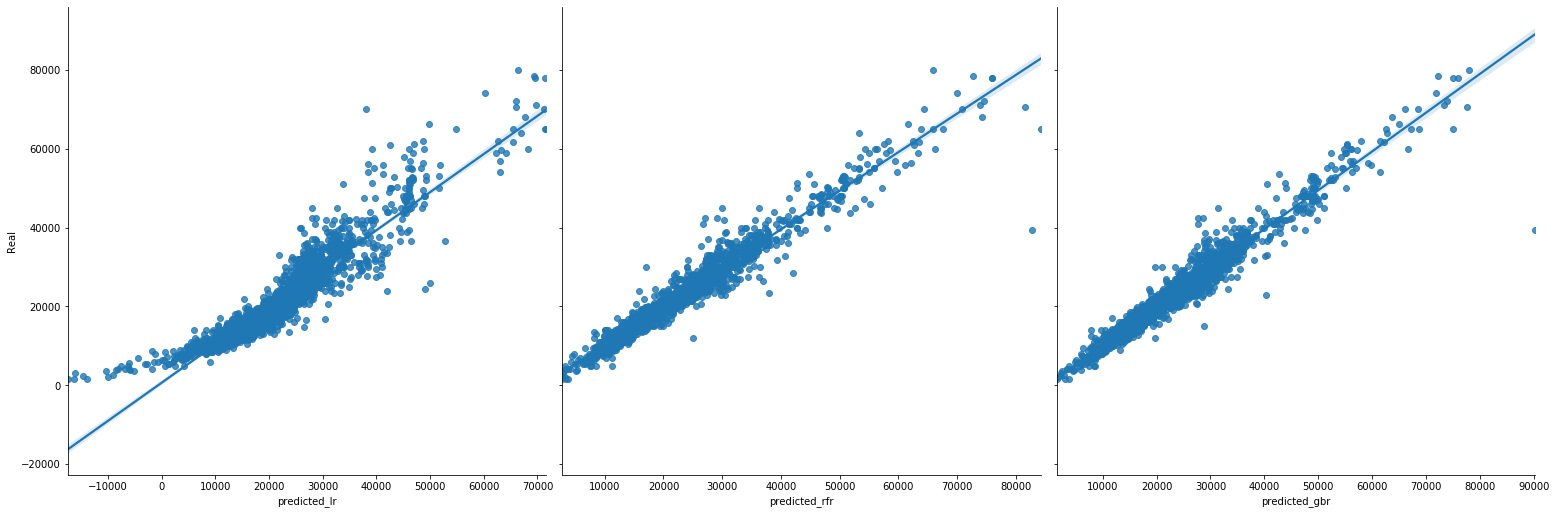

In [88]:
sns.pairplot(results,x_vars=['predicted_lr', 'predicted_rfr','predicted_gbr'],y_vars=['Real'],kind='reg',height=7,aspect=1)